# Assignment 08 -- Network Analysis

##### The following code uses NetworkX and City Cytoscape in order to perform network analysis of William Shakespeare's play <em>Romeo and Juliet</em>. Specifically, the analysis concerns how frequently do characters interact with each other in separate scenes. Characters themselves serve as nodes, while connections represent the edges. The weight is represented/calculated by the number of times each charatcer interacts with the other in the play. According to the analysis performed with NetworkX, Romeo is the character with highest degree centrality at 0.944 meaning that he interacts with the highest number of other characters. Juliet, in comparison, has degree centrality of 0.611 and has fewer so-called neighbors compared to Romeo. The resulting visualization was performed with Dash Cytoscape and is available to view in the folder under the title "Network Analysis Visualiation."

In [1]:
import dash
import dash_cytoscape as cyto
from dash import html, dcc
from dash.dependencies import Input, Output
from jupyter_dash import JupyterDash
from jupyter_dash.comms import _send_jupyter_config_comm_request

In [2]:
_send_jupyter_config_comm_request()

In [4]:
JupyterDash.infer_jupyter_proxy_config()

In [6]:
with open('Assignment 8/Romeoandjuliet.txt') as f:
    x = f.read() 

In [7]:
x.split('Act')[1].split('SCENE')[1]

' I. A public place.\n\n Enter Sampson and Gregory armed with swords and bucklers.\n\nSAMPSON.\nGregory, on my word, we’ll not carry coals.\n\nGREGORY.\nNo, for then we should be colliers.\n\nSAMPSON.\nI mean, if we be in choler, we’ll draw.\n\nGREGORY.\nAy, while you live, draw your neck out o’ the collar.\n\nSAMPSON.\nI strike quickly, being moved.\n\nGREGORY.\nBut thou art not quickly moved to strike.\n\nSAMPSON.\nA dog of the house of Montague moves me.\n\nGREGORY.\nTo move is to stir; and to be valiant is to stand: therefore, if thou\nart moved, thou runn’st away.\n\nSAMPSON.\nA dog of that house shall move me to stand.\nI will take the wall of any man or maid of Montague’s.\n\nGREGORY.\nThat shows thee a weak slave, for the weakest goes to the wall.\n\nSAMPSON.\nTrue, and therefore women, being the weaker vessels, are ever thrust to\nthe wall: therefore I will push Montague’s men from the wall, and\nthrust his maids to the wall.\n\nGREGORY.\nThe quarrel is between our masters and

In [8]:
acts = x.split('ACT')[6:]

In [9]:
acts[-1]

' V\n\nSCENE I. Mantua. A Street.\n\n Enter Romeo.\n\nROMEO.\nIf I may trust the flattering eye of sleep,\nMy dreams presage some joyful news at hand.\nMy bosom’s lord sits lightly in his throne;\nAnd all this day an unaccustom’d spirit\nLifts me above the ground with cheerful thoughts.\nI dreamt my lady came and found me dead,—\nStrange dream, that gives a dead man leave to think!—\nAnd breath’d such life with kisses in my lips,\nThat I reviv’d, and was an emperor.\nAh me, how sweet is love itself possess’d,\nWhen but love’s shadows are so rich in joy.\n\n Enter Balthasar.\n\nNews from Verona! How now, Balthasar?\nDost thou not bring me letters from the Friar?\nHow doth my lady? Is my father well?\nHow fares my Juliet? That I ask again;\nFor nothing can be ill if she be well.\n\nBALTHASAR.\nThen she is well, and nothing can be ill.\nHer body sleeps in Capel’s monument,\nAnd her immortal part with angels lives.\nI saw her laid low in her kindred’s vault,\nAnd presently took post to tel

In [10]:
acts[1].split('SCENE')[-1]

' VI. Friar Lawrence’s Cell.\n\n Enter Friar Lawrence and Romeo.\n\nFRIAR LAWRENCE.\nSo smile the heavens upon this holy act\nThat after-hours with sorrow chide us not.\n\nROMEO.\nAmen, amen, but come what sorrow can,\nIt cannot countervail the exchange of joy\nThat one short minute gives me in her sight.\nDo thou but close our hands with holy words,\nThen love-devouring death do what he dare,\nIt is enough I may but call her mine.\n\nFRIAR LAWRENCE.\nThese violent delights have violent ends,\nAnd in their triumph die; like fire and powder,\nWhich as they kiss consume. The sweetest honey\nIs loathsome in his own deliciousness,\nAnd in the taste confounds the appetite.\nTherefore love moderately: long love doth so;\nToo swift arrives as tardy as too slow.\n\n Enter Juliet.\n\nHere comes the lady. O, so light a foot\nWill ne’er wear out the everlasting flint.\nA lover may bestride the gossamers\nThat idles in the wanton summer air\nAnd yet not fall; so light is vanity.\n\nJULIET.\nGood e

In [11]:
acts[1].split('SCENE')[-1].find('FRIAR LAWRENCE')

63

In [12]:
characters = [
    'MERCUTIO',
    'PARIS',
    'MONTAGUE',
    'LADY MONTAGUE',
    'ROMEO',
    'BENVOLIO',
    'ABRAM',
    'BALTHASAR',
    'CAPULET',
    'LADY CAPULET',
    'JULIET',
    'TYBALT',
    'CAPULET’S COUSIN',
    'NURSE',
    'PETER',
    'SAMPSON',
    'GREGORY',
    'FRIAR LAWRENCE',
    'FRIAR JOHN'
]
    

In [13]:
len(acts)

5

In [14]:
charnum = {}

connections = {}
for i in range(len(characters)-1):
    for j in range(i+1,len(characters)):
        connections[(characters[i],characters[j])] = 0

for k in characters:
    charnum[k] = 0

for i in acts:
    for j in i.split('SCENE')[1:]:
        scenechars = []
        for k in characters:
            if j.find(k) != -1:
                scenechars.append(k)
                charnum[k] += 1
        for a in range(len(scenechars)-1):
            for b in range(a+1,len(scenechars)):
                connections[(scenechars[a],scenechars[b])] += 1

The following are all the characters in the play and the number of scenes that they appear in. This information will be used as nodes in the later visualization.

In [15]:
charnum

{'MERCUTIO': 4,
 'PARIS': 5,
 'MONTAGUE': 3,
 'LADY MONTAGUE': 1,
 'ROMEO': 14,
 'BENVOLIO': 7,
 'ABRAM': 1,
 'BALTHASAR': 2,
 'CAPULET': 12,
 'LADY CAPULET': 10,
 'JULIET': 11,
 'TYBALT': 3,
 'CAPULET’S COUSIN': 1,
 'NURSE': 11,
 'PETER': 2,
 'SAMPSON': 1,
 'GREGORY': 1,
 'FRIAR LAWRENCE': 7,
 'FRIAR JOHN': 1}

The following code shows how often, if at all, characters in the play interract with each other.

In [16]:
connections

{('MERCUTIO', 'PARIS'): 0,
 ('MERCUTIO', 'MONTAGUE'): 1,
 ('MERCUTIO', 'LADY MONTAGUE'): 0,
 ('MERCUTIO', 'ROMEO'): 4,
 ('MERCUTIO', 'BENVOLIO'): 4,
 ('MERCUTIO', 'ABRAM'): 0,
 ('MERCUTIO', 'BALTHASAR'): 0,
 ('MERCUTIO', 'CAPULET'): 1,
 ('MERCUTIO', 'LADY CAPULET'): 1,
 ('MERCUTIO', 'JULIET'): 0,
 ('MERCUTIO', 'TYBALT'): 1,
 ('MERCUTIO', 'CAPULET’S COUSIN'): 0,
 ('MERCUTIO', 'NURSE'): 1,
 ('MERCUTIO', 'PETER'): 1,
 ('MERCUTIO', 'SAMPSON'): 0,
 ('MERCUTIO', 'GREGORY'): 0,
 ('MERCUTIO', 'FRIAR LAWRENCE'): 0,
 ('MERCUTIO', 'FRIAR JOHN'): 0,
 ('PARIS', 'MONTAGUE'): 1,
 ('PARIS', 'LADY MONTAGUE'): 0,
 ('PARIS', 'ROMEO'): 2,
 ('PARIS', 'BENVOLIO'): 1,
 ('PARIS', 'ABRAM'): 0,
 ('PARIS', 'BALTHASAR'): 1,
 ('PARIS', 'CAPULET'): 4,
 ('PARIS', 'LADY CAPULET'): 3,
 ('PARIS', 'JULIET'): 2,
 ('PARIS', 'TYBALT'): 0,
 ('PARIS', 'CAPULET’S COUSIN'): 0,
 ('PARIS', 'NURSE'): 1,
 ('PARIS', 'PETER'): 1,
 ('PARIS', 'SAMPSON'): 0,
 ('PARIS', 'GREGORY'): 0,
 ('PARIS', 'FRIAR LAWRENCE'): 3,
 ('PARIS', 'FRIAR J

In [17]:
for k,v in charnum.items():
    print(k,v)

MERCUTIO 4
PARIS 5
MONTAGUE 3
LADY MONTAGUE 1
ROMEO 14
BENVOLIO 7
ABRAM 1
BALTHASAR 2
CAPULET 12
LADY CAPULET 10
JULIET 11
TYBALT 3
CAPULET’S COUSIN 1
NURSE 11
PETER 2
SAMPSON 1
GREGORY 1
FRIAR LAWRENCE 7
FRIAR JOHN 1


The following code creates the nodes for the visualization.

In [18]:
graphitems = []

for k,v in charnum.items():
    dashnode = {'data': {'id': k,
                         'label': k.title(),
                         'size': str(v)}}
    graphitems.append(dashnode)
    
graphitems

[{'data': {'id': 'MERCUTIO', 'label': 'Mercutio', 'size': '4'}},
 {'data': {'id': 'PARIS', 'label': 'Paris', 'size': '5'}},
 {'data': {'id': 'MONTAGUE', 'label': 'Montague', 'size': '3'}},
 {'data': {'id': 'LADY MONTAGUE', 'label': 'Lady Montague', 'size': '1'}},
 {'data': {'id': 'ROMEO', 'label': 'Romeo', 'size': '14'}},
 {'data': {'id': 'BENVOLIO', 'label': 'Benvolio', 'size': '7'}},
 {'data': {'id': 'ABRAM', 'label': 'Abram', 'size': '1'}},
 {'data': {'id': 'BALTHASAR', 'label': 'Balthasar', 'size': '2'}},
 {'data': {'id': 'CAPULET', 'label': 'Capulet', 'size': '12'}},
 {'data': {'id': 'LADY CAPULET', 'label': 'Lady Capulet', 'size': '10'}},
 {'data': {'id': 'JULIET', 'label': 'Juliet', 'size': '11'}},
 {'data': {'id': 'TYBALT', 'label': 'Tybalt', 'size': '3'}},
 {'data': {'id': 'CAPULET’S COUSIN',
   'label': 'Capulet’S Cousin',
   'size': '1'}},
 {'data': {'id': 'NURSE', 'label': 'Nurse', 'size': '11'}},
 {'data': {'id': 'PETER', 'label': 'Peter', 'size': '2'}},
 {'data': {'id': '

This code is similar to the code above but for edges. The weight represents the number of scenes that characters share together.

In [19]:
graphitems = []

for k,v in charnum.items():
    dashnode = {'data': {'id': k,
                         'label': k.title(),
                         'size': str(v)}}
    graphitems.append(dashnode)

for k,v in connections.items():
    if v != 0:
        dashedge = {'data': {'source': k[0],
                             'target': k[1],
                             'weight': v}}
        graphitems.append(dashedge)
    
graphitems

[{'data': {'id': 'MERCUTIO', 'label': 'Mercutio', 'size': '4'}},
 {'data': {'id': 'PARIS', 'label': 'Paris', 'size': '5'}},
 {'data': {'id': 'MONTAGUE', 'label': 'Montague', 'size': '3'}},
 {'data': {'id': 'LADY MONTAGUE', 'label': 'Lady Montague', 'size': '1'}},
 {'data': {'id': 'ROMEO', 'label': 'Romeo', 'size': '14'}},
 {'data': {'id': 'BENVOLIO', 'label': 'Benvolio', 'size': '7'}},
 {'data': {'id': 'ABRAM', 'label': 'Abram', 'size': '1'}},
 {'data': {'id': 'BALTHASAR', 'label': 'Balthasar', 'size': '2'}},
 {'data': {'id': 'CAPULET', 'label': 'Capulet', 'size': '12'}},
 {'data': {'id': 'LADY CAPULET', 'label': 'Lady Capulet', 'size': '10'}},
 {'data': {'id': 'JULIET', 'label': 'Juliet', 'size': '11'}},
 {'data': {'id': 'TYBALT', 'label': 'Tybalt', 'size': '3'}},
 {'data': {'id': 'CAPULET’S COUSIN',
   'label': 'Capulet’S Cousin',
   'size': '1'}},
 {'data': {'id': 'NURSE', 'label': 'Nurse', 'size': '11'}},
 {'data': {'id': 'PETER', 'label': 'Peter', 'size': '2'}},
 {'data': {'id': '

In [20]:
graphitems = []

for k,v in charnum.items():
    dashnode = {'data': {'id': k,
                         'label': k.title(),
                         'size': str(v)}}
    graphitems.append(dashnode)

correction_factor = max(connections.values())
print(correction_factor)
for k,v in connections.items():
    if v != 0:
        dashedge = {'data': {'source': k[0],
                             'target': k[1],
                             'weight': v/correction_factor}}
        graphitems.append(dashedge)

10


In [21]:
import networkx as nx
import matplotlib.pyplot as plt

In [22]:
nxgraphitems = []

for k,v in connections.items():
    if v != 0:
        dashedge = (k[0],k[1])
        nxgraphitems.append(dashedge)
    
nxgraphitems

[('MERCUTIO', 'MONTAGUE'),
 ('MERCUTIO', 'ROMEO'),
 ('MERCUTIO', 'BENVOLIO'),
 ('MERCUTIO', 'CAPULET'),
 ('MERCUTIO', 'LADY CAPULET'),
 ('MERCUTIO', 'TYBALT'),
 ('MERCUTIO', 'NURSE'),
 ('MERCUTIO', 'PETER'),
 ('PARIS', 'MONTAGUE'),
 ('PARIS', 'ROMEO'),
 ('PARIS', 'BENVOLIO'),
 ('PARIS', 'BALTHASAR'),
 ('PARIS', 'CAPULET'),
 ('PARIS', 'LADY CAPULET'),
 ('PARIS', 'JULIET'),
 ('PARIS', 'NURSE'),
 ('PARIS', 'PETER'),
 ('PARIS', 'FRIAR LAWRENCE'),
 ('MONTAGUE', 'LADY MONTAGUE'),
 ('MONTAGUE', 'ROMEO'),
 ('MONTAGUE', 'BENVOLIO'),
 ('MONTAGUE', 'ABRAM'),
 ('MONTAGUE', 'BALTHASAR'),
 ('MONTAGUE', 'CAPULET'),
 ('MONTAGUE', 'LADY CAPULET'),
 ('MONTAGUE', 'JULIET'),
 ('MONTAGUE', 'TYBALT'),
 ('MONTAGUE', 'SAMPSON'),
 ('MONTAGUE', 'GREGORY'),
 ('MONTAGUE', 'FRIAR LAWRENCE'),
 ('LADY MONTAGUE', 'ROMEO'),
 ('LADY MONTAGUE', 'BENVOLIO'),
 ('LADY MONTAGUE', 'ABRAM'),
 ('LADY MONTAGUE', 'CAPULET'),
 ('LADY MONTAGUE', 'LADY CAPULET'),
 ('LADY MONTAGUE', 'TYBALT'),
 ('LADY MONTAGUE', 'SAMPSON'),
 ('LADY 

In [23]:
G = nx.Graph()

In [24]:
G.add_edges_from(nxgraphitems)

In [25]:
G.nodes

NodeView(('MERCUTIO', 'MONTAGUE', 'ROMEO', 'BENVOLIO', 'CAPULET', 'LADY CAPULET', 'TYBALT', 'NURSE', 'PETER', 'PARIS', 'BALTHASAR', 'JULIET', 'FRIAR LAWRENCE', 'LADY MONTAGUE', 'ABRAM', 'SAMPSON', 'GREGORY', 'CAPULET’S COUSIN', 'FRIAR JOHN'))

In [26]:
nx.degree_centrality(G)

{'MERCUTIO': 0.4444444444444444,
 'MONTAGUE': 0.7777777777777777,
 'ROMEO': 0.9444444444444444,
 'BENVOLIO': 0.8333333333333333,
 'CAPULET': 0.9444444444444444,
 'LADY CAPULET': 0.8888888888888888,
 'TYBALT': 0.7222222222222222,
 'NURSE': 0.611111111111111,
 'PETER': 0.4444444444444444,
 'PARIS': 0.5555555555555556,
 'BALTHASAR': 0.38888888888888884,
 'JULIET': 0.611111111111111,
 'FRIAR LAWRENCE': 0.5555555555555556,
 'LADY MONTAGUE': 0.5,
 'ABRAM': 0.5,
 'SAMPSON': 0.5,
 'GREGORY': 0.5,
 'CAPULET’S COUSIN': 0.3333333333333333,
 'FRIAR JOHN': 0.05555555555555555}

The following shows that Romeo and Capulet have the same highest degree centrality while Juliet is closer to being the middle which means that Juliet does not share the same number of scenes with other characters in the play.

In [27]:
dc = nx.degree_centrality(G)
for i in sorted(dc, key=dc.get, reverse=True):
    print('{:15s}: {:.3f}'.format(i.title(), dc[i]))

Romeo          : 0.944
Capulet        : 0.944
Lady Capulet   : 0.889
Benvolio       : 0.833
Montague       : 0.778
Tybalt         : 0.722
Nurse          : 0.611
Juliet         : 0.611
Paris          : 0.556
Friar Lawrence : 0.556
Lady Montague  : 0.500
Abram          : 0.500
Sampson        : 0.500
Gregory        : 0.500
Mercutio       : 0.444
Peter          : 0.444
Balthasar      : 0.389
Capulet’S Cousin: 0.333
Friar John     : 0.056


The following two examples highlight what was shown in the previous code. Romeo has more "neighbours" meaning other characters that he interacts with than Juliet.

In [28]:
list(G.neighbors('ROMEO'))

['MERCUTIO',
 'PARIS',
 'MONTAGUE',
 'LADY MONTAGUE',
 'BENVOLIO',
 'ABRAM',
 'BALTHASAR',
 'CAPULET',
 'LADY CAPULET',
 'JULIET',
 'TYBALT',
 'CAPULET’S COUSIN',
 'NURSE',
 'PETER',
 'SAMPSON',
 'GREGORY',
 'FRIAR LAWRENCE']

In [29]:
list(G.neighbors('JULIET'))

['PARIS',
 'MONTAGUE',
 'ROMEO',
 'BENVOLIO',
 'BALTHASAR',
 'CAPULET',
 'LADY CAPULET',
 'TYBALT',
 'CAPULET’S COUSIN',
 'NURSE',
 'FRIAR LAWRENCE']

In [30]:
nx.shortest_path(G,'JULIET','MERCUTIO')

['JULIET', 'MONTAGUE', 'MERCUTIO']

In [31]:
nx.betweenness_centrality(G)

{'MERCUTIO': 0.002749247847287063,
 'MONTAGUE': 0.04637410519763461,
 'ROMEO': 0.08284573088494658,
 'BENVOLIO': 0.04537296400041499,
 'CAPULET': 0.08284573088494658,
 'LADY CAPULET': 0.06421827990455442,
 'TYBALT': 0.025842929764498392,
 'NURSE': 0.019421101774042947,
 'PETER': 0.004746342981637099,
 'PARIS': 0.007713455752671439,
 'BALTHASAR': 0.0,
 'JULIET': 0.018108724971470074,
 'FRIAR LAWRENCE': 0.11610125531694157,
 'LADY MONTAGUE': 0.0,
 'ABRAM': 0.0,
 'SAMPSON': 0.0,
 'GREGORY': 0.0,
 'CAPULET’S COUSIN': 0.0,
 'FRIAR JOHN': 0.0}

In [32]:
dc = nx.betweenness_centrality(G)
for i in sorted(dc, key=dc.get, reverse=True):
    print('{:15s}: {:.3f}'.format(i.title(), dc[i]))

Friar Lawrence : 0.116
Romeo          : 0.083
Capulet        : 0.083
Lady Capulet   : 0.064
Montague       : 0.046
Benvolio       : 0.045
Tybalt         : 0.026
Nurse          : 0.019
Juliet         : 0.018
Paris          : 0.008
Peter          : 0.005
Mercutio       : 0.003
Balthasar      : 0.000
Lady Montague  : 0.000
Abram          : 0.000
Sampson        : 0.000
Gregory        : 0.000
Capulet’S Cousin: 0.000
Friar John     : 0.000


In [33]:
from networkx.algorithms.community.centrality import girvan_newman

In [34]:
communities = girvan_newman(G)

The following uses above information based on set up edges and sets up communities that we can observe in the play.

[['MERCUTIO', 'LADY MONTAGUE', 'CAPULET’S COUSIN', 'GREGORY', 'SAMPSON', 'FRIAR LAWRENCE', 'BALTHASAR', 'BENVOLIO', 'PARIS', 'ROMEO', 'ABRAM', 'CAPULET', 'LADY CAPULET', 'TYBALT', 'NURSE', 'JULIET', 'PETER', 'MONTAGUE'], ['FRIAR JOHN']]


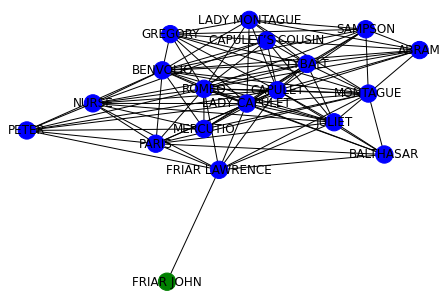

In [35]:
node_groups = []
for com in next(communities):
    node_groups.append(list(com))
 
print(node_groups)
 
color_map = []
for node in G:
    if node in node_groups[0]:
        color_map.append('blue')
    else:
        color_map.append('green')
nx.draw(G, node_color=color_map, with_labels=True)
plt.show()

In [36]:
nx.density(G)

0.5847953216374269

In [37]:
from networkx.algorithms.community import greedy_modularity_communities

The following code identified three communities as seen below.

In [38]:
greedy_modularity_communities(G)

[frozenset({'BENVOLIO',
            'LADY CAPULET',
            'MERCUTIO',
            'NURSE',
            'PARIS',
            'PETER'}),
 frozenset({'ABRAM',
            'CAPULET',
            'GREGORY',
            'LADY MONTAGUE',
            'ROMEO',
            'SAMPSON'}),
 frozenset({'BALTHASAR', 'FRIAR JOHN', 'FRIAR LAWRENCE', 'MONTAGUE'}),
 frozenset({'CAPULET’S COUSIN', 'JULIET', 'TYBALT'})]

In [39]:
communities = greedy_modularity_communities(G)
modularity_class = {}
for community_number, community in enumerate(communities):
    for name in community:
        modularity_class[name] = community_number

In [40]:
modularity_class

{'MERCUTIO': 0,
 'BENVOLIO': 0,
 'PARIS': 0,
 'NURSE': 0,
 'LADY CAPULET': 0,
 'PETER': 0,
 'LADY MONTAGUE': 1,
 'GREGORY': 1,
 'SAMPSON': 1,
 'ROMEO': 1,
 'ABRAM': 1,
 'CAPULET': 1,
 'FRIAR JOHN': 2,
 'BALTHASAR': 2,
 'MONTAGUE': 2,
 'FRIAR LAWRENCE': 2,
 'JULIET': 3,
 'CAPULET’S COUSIN': 3,
 'TYBALT': 3}

The following code visualized the above communities.

[['MERCUTIO', 'BENVOLIO', 'PARIS', 'NURSE', 'LADY CAPULET', 'PETER'], ['LADY MONTAGUE', 'GREGORY', 'SAMPSON', 'ROMEO', 'ABRAM', 'CAPULET'], ['FRIAR JOHN', 'BALTHASAR', 'MONTAGUE', 'FRIAR LAWRENCE'], ['JULIET', 'CAPULET’S COUSIN', 'TYBALT']]


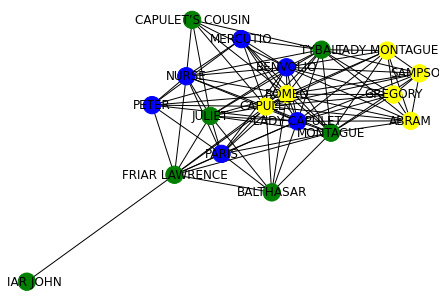

In [41]:
communities = greedy_modularity_communities(G)

node_groups = []
for com in communities:
    node_groups.append(list(com))
 
print(node_groups)
 
color_map = []
for node in G:
    if node in node_groups[0]:
        color_map.append('blue')
    elif node in node_groups[1]:
        color_map.append('yellow')
    else:
        color_map.append('green')
nx.draw(G, node_color=color_map, with_labels=True)
plt.show()

In [42]:
graphitems = []

for k,v in charnum.items():
    if k in node_groups[0]:
        modularity = 'gold'
    elif k in node_groups[1]:
        modularity = 'green'
    else:
        modularity = 'pink'
    dashnode = {'data': {'id': k,
                         'label': k.title(),
                         'size': str(v),'modularity': modularity}}
    graphitems.append(dashnode)

correction_factor = max(connections.values())
print(correction_factor)
for k,v in connections.items():
    if v != 0:
        dashedge = {'data': {'source': k[0],
                             'target': k[1],
                             'weight': v/correction_factor}}
        graphitems.append(dashedge)
    
graphitems

10


[{'data': {'id': 'MERCUTIO',
   'label': 'Mercutio',
   'size': '4',
   'modularity': 'gold'}},
 {'data': {'id': 'PARIS',
   'label': 'Paris',
   'size': '5',
   'modularity': 'gold'}},
 {'data': {'id': 'MONTAGUE',
   'label': 'Montague',
   'size': '3',
   'modularity': 'pink'}},
 {'data': {'id': 'LADY MONTAGUE',
   'label': 'Lady Montague',
   'size': '1',
   'modularity': 'green'}},
 {'data': {'id': 'ROMEO',
   'label': 'Romeo',
   'size': '14',
   'modularity': 'green'}},
 {'data': {'id': 'BENVOLIO',
   'label': 'Benvolio',
   'size': '7',
   'modularity': 'gold'}},
 {'data': {'id': 'ABRAM',
   'label': 'Abram',
   'size': '1',
   'modularity': 'green'}},
 {'data': {'id': 'BALTHASAR',
   'label': 'Balthasar',
   'size': '2',
   'modularity': 'pink'}},
 {'data': {'id': 'CAPULET',
   'label': 'Capulet',
   'size': '12',
   'modularity': 'green'}},
 {'data': {'id': 'LADY CAPULET',
   'label': 'Lady Capulet',
   'size': '10',
   'modularity': 'gold'}},
 {'data': {'id': 'JULIET',
   'la

In [43]:
app = JupyterDash(__name__)

app.layout = html.Div([
    cyto.Cytoscape(
        layout={'name': 'cose'},
        elements=graphitems,
        style={'width': '100%', 'height': '750px'},
        stylesheet=[
            {
                'selector': 'node',
                'style': {
                    'content':'data(label)',
                    'text-halign':'center',
                    'text-valign':'center',
                    'width': 'data(size)',
                    'height': 'data(size)',
                    'font-size': 4,
                    'color': 'black',
                    'background-color': 'data(modularity)',
                    'text-outline-color': 'white',
                    'text-outline-width': 0.2,
                    'shape':'circle'
                }
            },
            {
                'selector':'edge',
                'style': {
                    'width':'data(weight)',
                    'line-color': 'grey',
                  }
            },
        ]
    )
])

app.run_server(debug=True)

Dash app running on https://jupyter.idre.ucla.edu/user/dyana@ucla.edu/proxy/8050/
